In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(256, 256)


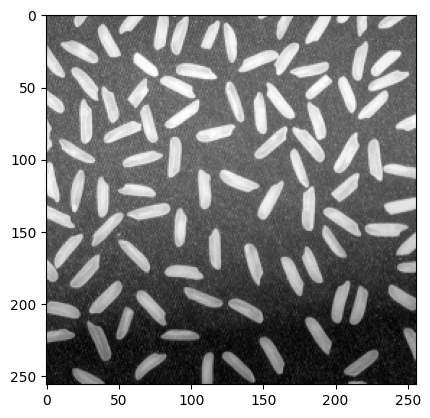

In [22]:
img = cv2.imread('../images/rice.bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gimg = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gimg.shape)
plt.imshow(gimg, cmap='gray')

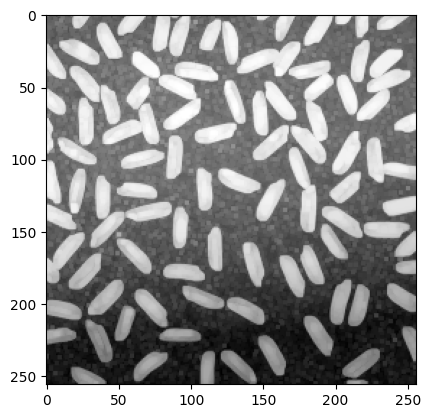

In [23]:
kernel = np.ones((3, 3), np.uint8)
dilateimg = cv2.dilate(gimg, kernel, iterations = 1)
plt.imshow(dilateimg, cmap='gray')

In [24]:
gBin = np.zeros((gimg.shape[0], gimg.shape[1]), dtype=np.ubyte)

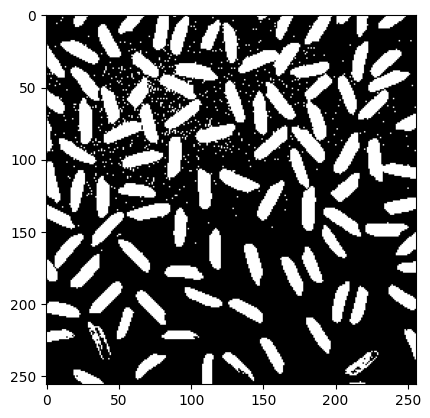

In [25]:
threshold = 120

for h in range(gimg.shape[0]):
  for w in range(gimg.shape[1]):
    if(gimg[h, w] > threshold):
      gBin[h, w] = 255
    
plt.imshow(gBin, cmap='gray')

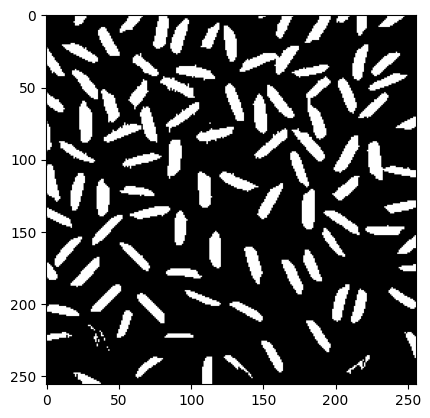

In [26]:
kernel = np.ones((4,1), np.uint8)
erodeimg = cv2.erode(gBin, kernel, iterations = 1)
plt.imshow(erodeimg, cmap='gray')

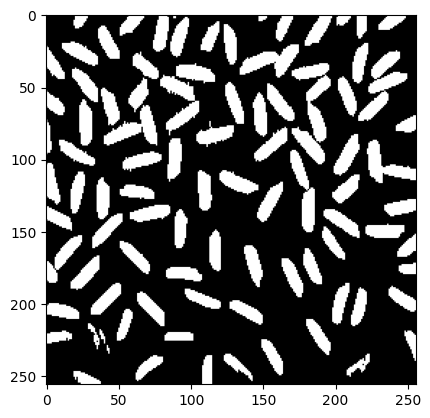

In [27]:
kernel = np.ones((4,1), np.uint8)
dilateimg = cv2.dilate(erodeimg, kernel, iterations = 1)
plt.imshow(dilateimg, cmap='gray')

In [28]:
num_labels, labels = cv2.connectedComponents(dilateimg, 4)
print('number of rices : ', num_labels)

number of rices :  92


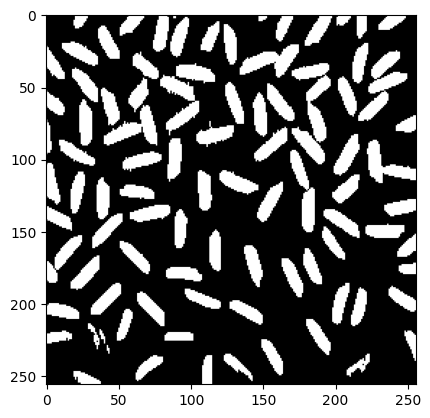

In [29]:
kernel = np.ones((4,1), np.uint8)
openimg = cv2.morphologyEx(gBin, cv2.MORPH_OPEN, kernel)
plt.imshow(openimg, cmap='gray')